In [1]:
(require math/statistics
         racket/list)

(define (sbs-hist-vals values [n-bins 15])
  (let* ([sorted-vals (sort values <)]
         [bottom (quantile 0.01 < sorted-vals)]
         [top (quantile 0.99 < sorted-vals)]
         [bin-width (/ (- top bottom) (- n-bins 2))]
         [low (for/list ([b (range n-bins)])
                (if (= b 0)
                    -inf.0
                    (+ bottom (* (- b 1) bin-width))))]
         [high (for/list ([b (range n-bins)])
                (if (= b (- n-bins 1))
                    +inf.0
                    (+ bottom (* b bin-width))))]
         [bin-counts (for/list ([b (range n-bins)])
                 (length (filter (lambda (v) (and (>= v (list-ref low b)) (< v (list-ref high b)))) sorted-vals)))])
     (map (lambda (n) `#(x ,(list-ref bin-counts n))) (range n-bins))))

In [2]:

(define xs (repeat (lambda () (normal 0 1)) 100))
(define vs (sbs-hist-vals xs))
vs

(#(x 0) #(x 5) #(x 3) #(x 11) #(x 14) #(x 10) #(x 11) #(x 15) #(x 10) #(x 8) #(x 6) #(x 3) #(x 0) #(x 2) #(x 2))

Now I am explaining all about fish:

$$f = x^{f-s_h}$$.

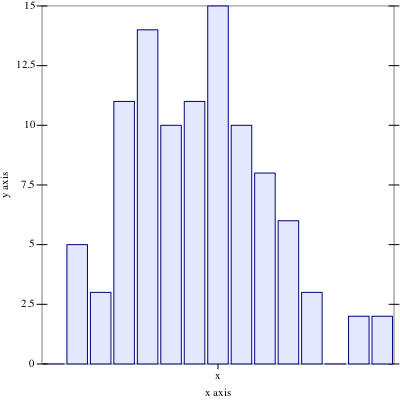

In [7]:
(require plot/pict)
(plot (discrete-histogram vs))

In [5]:
(define (log-odds p) (- (log p) (log (- 1 p))))


In [6]:
(log-odds 0.7)


0.8472978603872034

In [13]:
(log-odds 0.99)

4.59511985013459

In [14]:
(define (logistic x) (/ 1 (+ 1 (exp (- x)))))

In [15]:
(logistic 4.5951198501346)

0.9900000000000001

In [17]:
(define n 9)
(define current-k 4)
(define (p-hat k n) (/ (+ k 0.5) (+ n 1)))


In [30]:
(define scale 1)
(define mu (log-odds (p-hat current-k n)))
(define x (normal mu scale))
(define new-k (floor (* (logistic x) (+ 1 n))))


new-k

In [59]:
(define (glerb i) (/ (+ (* 0.01 i) 1.1) (+ (* 0.01 i) 1)))
(map glerb '(1 5 10 50 100 1000 5000 10000))

(1.099009900990099 1.0952380952380953 1.090909090909091 1.0666666666666667 1.05 1.009090909090909 1.0019607843137255 1.000990099009901)

In [24]:
(logistic (+ mu (normal 0 1)))


0.34026075075820794

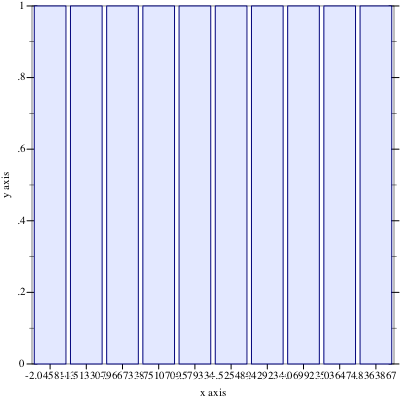

In [43]:
(require gamble/viz)
(hist-pict (repeat (lambda () (normal 0 1)) 10))

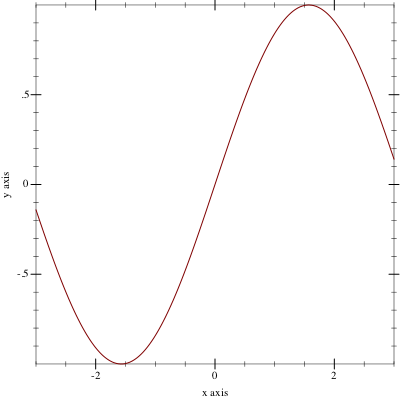

In [8]:
(require plot/pict)
(plot (function sin (- 3) 3))